# Example 11: Dynamic Clausius-Clapeyron integration

In this example, the pressure-temperature phase diagram of Ti will be calculated using dynamic Clausius-Clapeyron integration. We will use two phases BCC and liquid, and calculate the melting temperature variation with pressure.

**Dynamic Clausius-Clapeyron is still an experimental feature in calphy. In case any errors are observed, please raise an issue on the calphy repository.**

The EAM potential that will be used: 

[M. I. Mendelev, T. L. Underwood, G. J. Ackland, "Development of an interatomic potential for the simulation of defects, plasticity, and phase transformations in titanium" J. Chem. Phys. 145, 154102 (2016)](https://doi.org/10.1063/1.4964654)

The initial step is to find a single coexistence point. For this we will run free energy calculations for BCC and liquid phases at pressure of 10000 bar, and temperature range of 1750-2000 K. The input files are provided in `input_bcc_p1000.yaml` and `input_lqd_p1000.yaml`.

The calculation can be run by:

```
calphy -i inputfile
```

After the first calculation is over, we can read in the results

## Melting temperature at a low pressure

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
st, sfe, sferr = np.loadtxt("ts-BCC-1750-1000/temperature_sweep.dat", unpack=True)
lt, lfe, lferr = np.loadtxt("ts-LQD-1750-1000/temperature_sweep.dat", unpack=True)

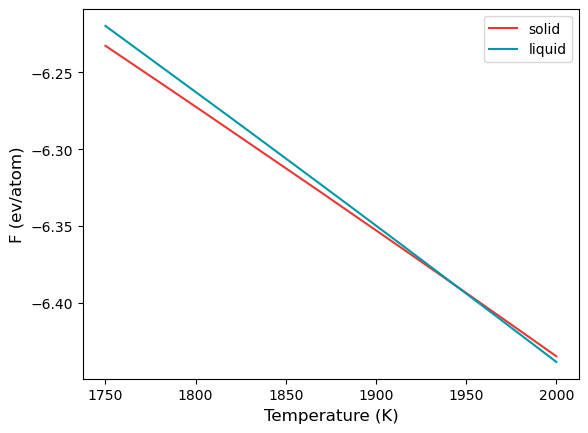

In [3]:
plt.plot(st, sfe, color="#E53935", label="solid")
plt.plot(lt, lfe, color="#0097A7", label="liquid")
plt.xlabel("Temperature (K)", fontsize=12)
plt.ylabel("F (ev/atom)", fontsize=12)
plt.legend()

In [4]:
args = np.argsort(np.abs(sfe-lfe))
print(st[args[0]], "K")

1945.6118115313632 K


The coexistence temperature at 1000 bar is 1946 K. 

Now we can start a calculation at this coexistence point for BCC and liquid phases. The input is given in `input_bcc_dcc.yaml` and `input_lqd_dcc.yaml`. We choose a temperature range of 1946 - 2150 to calculate the coexistence pressure. The mode used in the calculation is `mts`. 

Once the calculation is done, we can integrate using the `integrate_dcc` method.

In [5]:
from calphy.integrators import integrate_dcc

The `integrate_dcc` method takes two folders where we performed the dynamic Clausius-Clapeyron integrations, and returns an array of coexistence temperature and pressure.

In [6]:
press, temp = integrate_dcc("mts-BCC-1946-1000", "mts-LQD-1946-1000")

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.99it/s]

No of peaks #9


We can now plot the results

Text(0.5, 0, 'Pressure (GPa)')

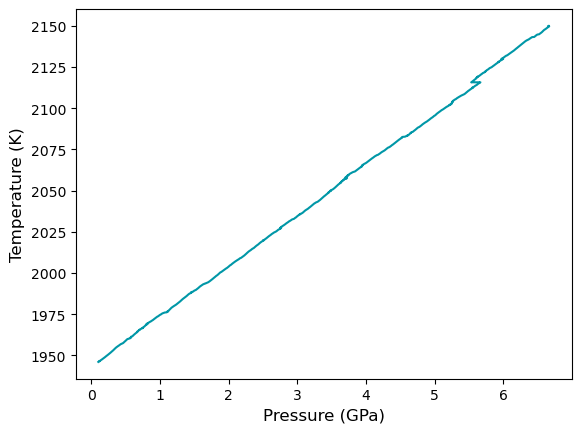

In [9]:
plt.plot(press/10000, temp, color="#0097A7")
plt.ylabel("Temperature (K)", fontsize=12)
plt.xlabel("Pressure (GPa)", fontsize=12)

`integrate_dcc` method also provides an option to fit the data; to further smoothen it. For example,

In [10]:
press, temp = integrate_dcc("mts-BCC-1946-1000", "mts-LQD-1946-1000", fit_order=2)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.54it/s]

No of peaks #9


Text(0.5, 0, 'Pressure (GPa)')

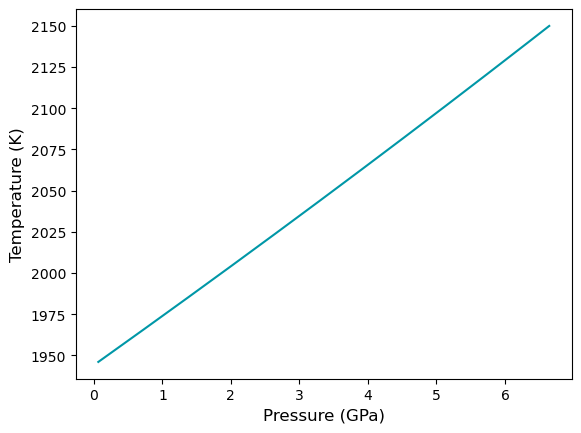

In [11]:
plt.plot(press/10000, temp, color="#0097A7")
plt.ylabel("Temperature (K)", fontsize=12)
plt.xlabel("Pressure (GPa)", fontsize=12)

The `fit_order` keyword chooses the order of the fitting process. To validate the results, we can calculate the coexistence point at a high pressure. In this case, we calculate at a pressure of 4 GPa, in addition to the already known coexistence point at low pressure.

In [15]:
parr = [1000, 40000]
tarr = [1946, 2063]

Text(0.5, 0, 'Pressure (GPa)')

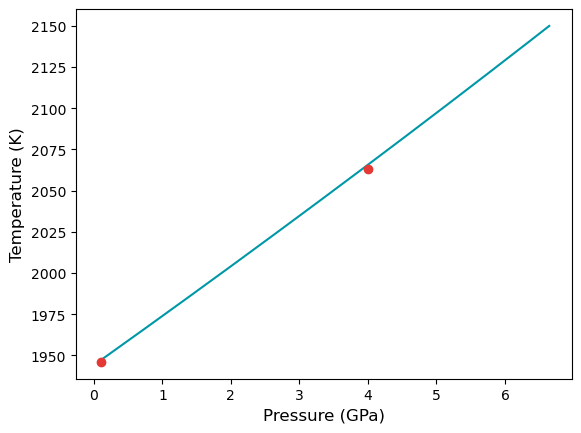

In [16]:
plt.plot(press/10000, temp, color="#0097A7")
plt.plot(np.array(parr)/10000, tarr, "o", color="#E53935")
plt.ylabel("Temperature (K)", fontsize=12)
plt.xlabel("Pressure (GPa)", fontsize=12)

We can see that there is good agreement between the dynamic Clausius-Clapeyron integration and direct calculations.